<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Comparison-of-Hi-C-experiments" data-toc-modified-id="Comparison-of-Hi-C-experiments-1">Comparison of Hi-C experiments</a></span><ul class="toc-item"><li><span><a href="#Between-replicates" data-toc-modified-id="Between-replicates-1.1">Between replicates</a></span><ul class="toc-item"><li><span><a href="#Mouse-B-cell" data-toc-modified-id="Mouse-B-cell-1.1.1">Mouse B cell</a></span></li><li><span><a href="#Mouse-PSC" data-toc-modified-id="Mouse-PSC-1.1.2">Mouse PSC</a></span></li></ul></li><li><span><a href="#Between-cell-types" data-toc-modified-id="Between-cell-types-1.2">Between cell types</a></span><ul class="toc-item"><li><span><a href="#replicate-1" data-toc-modified-id="replicate-1-1.2.1">replicate 1</a></span></li><li><span><a href="#replicate-2" data-toc-modified-id="replicate-2-1.2.2">replicate 2</a></span></li></ul></li></ul></li><li><span><a href="#Merge-Hi-C-experiments" data-toc-modified-id="Merge-Hi-C-experiments-2">Merge Hi-C experiments</a></span><ul class="toc-item"><li><span><a href="#Normalizing-merged-data" data-toc-modified-id="Normalizing-merged-data-2.1">Normalizing merged data</a></span></li><li><span><a href="#Save-to-BAM" data-toc-modified-id="Save-to-BAM-2.2">Save to BAM</a></span></li></ul></li></ul></div>

# Comparison of Hi-C experiments

In [1]:
from pytadbit.mapping.analyze import eig_correlate_matrices, correlate_matrices
from pytadbit import load_hic_data_from_reads
from cPickle import load
from matplotlib import pyplot as plt

In [2]:
reso = 200000
base_path = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'
bias_path = 'results/fragment/{1}_{2}/04_normalizing/biases_{0}_{1}_{2}.pick'
bads_path = 'results/fragment/{1}_{2}/04_normalizing/bad_columns_{0}_{1}_{2}.pick'

Write a little function to load HiCData obeject

In [3]:
def my_load_hic_data(cell, rep, reso):
    hic_data = load_hic_data_from_reads(base_path.format(cell, rep), resolution=reso)
    hic_data.bias = load(open(bias_path.format(reso, cell, rep)))
    hic_data.bads = load(open(bads_path.format(reso, cell, rep)))
    return hic_data

## Between replicates

### Mouse B cell

In [4]:
cel1 = 'mouse_B'
cel2 = 'mouse_B'
rep1  = 'rep1'
rep2  = 'rep2'

In [5]:
hic_data1 = my_load_hic_data(cel1, rep1, reso)
hic_data2 = my_load_hic_data(cel2, rep2, reso)

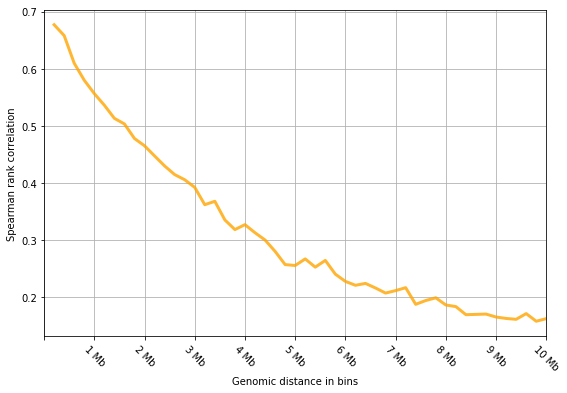

In [6]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=False, axe=axe, normalized=True)

In [7]:
hic_data1 = my_load_hic_data(cel1, rep1, 1000000)
hic_data2 = my_load_hic_data(cel1, rep2, 1000000)

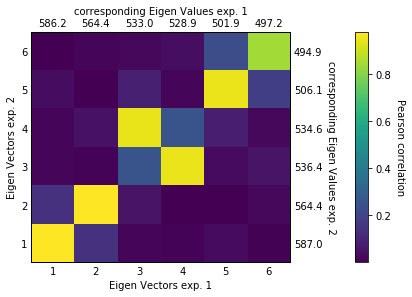

0.978 0.142 0.019 0.009 0.030 0.008

0.142 0.977 0.053 0.002 0.001 0.020

0.014 0.009 0.255 0.950 0.029 0.053

0.020 0.050 0.947 0.257 0.083 0.021

0.035 0.004 0.086 0.013 0.948 0.183

0.003 0.019 0.023 0.039 0.233 0.841



In [8]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

### Mouse PSC

In [9]:
cel2 = 'mouse_PSC'
rep1  = 'rep1'
rep2  = 'rep2'

In [10]:
hic_data1 = my_load_hic_data(cel2, rep1, reso)
hic_data2 = my_load_hic_data(cel2, rep2, reso)

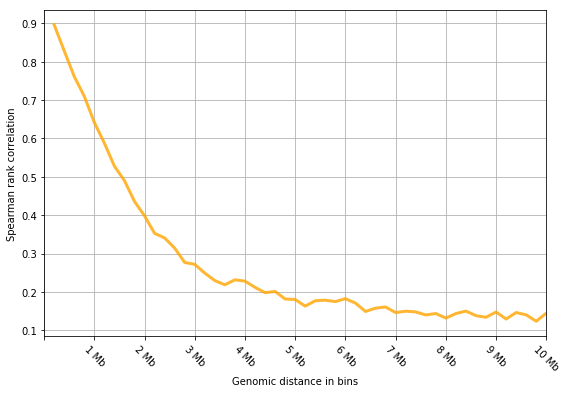

In [11]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=False, axe=axe)

In [12]:
hic_data1 = my_load_hic_data(cel2, rep1, 1000000)
hic_data2 = my_load_hic_data(cel2, rep2, 1000000)

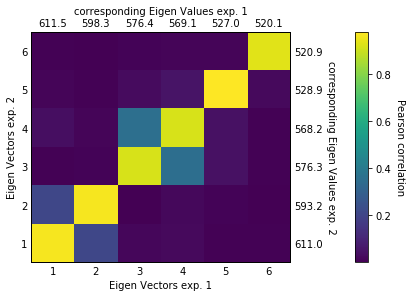

0.969 0.207 0.016 0.026 0.005 0.008

0.209 0.969 0.001 0.022 0.011 0.003

0.005 0.008 0.924 0.356 0.044 0.008

0.035 0.012 0.358 0.923 0.043 0.005

0.013 0.006 0.028 0.051 0.981 0.027

0.005 0.000 0.009 0.016 0.013 0.939



In [13]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

## Between cell types

### replicate 1

In [14]:
hic_data1 = my_load_hic_data(cel1, rep1, reso)
hic_data2 = my_load_hic_data(cel2, rep1, reso)

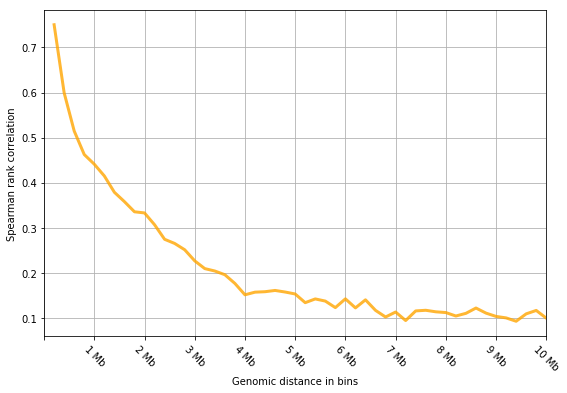

In [15]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=False, axe=axe)

In [16]:
hic_data1 = my_load_hic_data(cel1, rep1, 1000000)
hic_data2 = my_load_hic_data(cel2, rep1, 1000000)

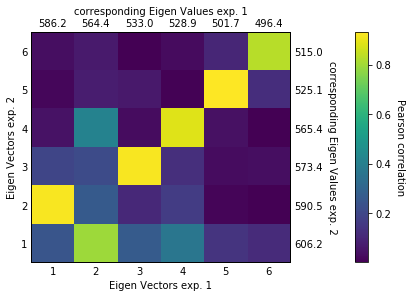

0.246 0.795 0.269 0.367 0.140 0.115

0.924 0.264 0.108 0.165 0.013 0.002

0.194 0.212 0.923 0.125 0.033 0.034

0.046 0.412 0.033 0.886 0.043 0.001

0.019 0.075 0.063 0.005 0.933 0.124

0.035 0.067 0.001 0.027 0.101 0.833



In [17]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

### replicate 2

In [18]:
hic_data1 = my_load_hic_data(cel1, rep2, reso)
hic_data2 = my_load_hic_data(cel2, rep2, reso)

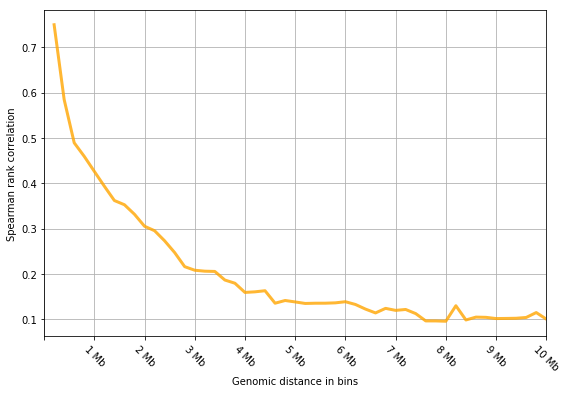

In [19]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=False, axe=axe)

In [20]:
hic_data1 = my_load_hic_data(cel1, rep2, 1000000)
hic_data2 = my_load_hic_data(cel2, rep2, 1000000)

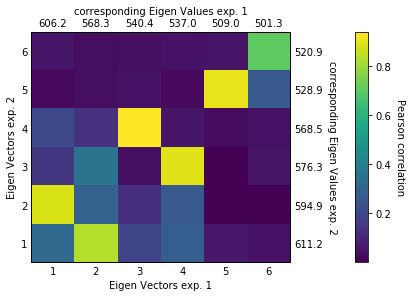

0.323 0.834 0.196 0.280 0.064 0.046

0.886 0.296 0.130 0.262 0.003 0.007

0.151 0.361 0.035 0.892 0.001 0.051

0.208 0.135 0.938 0.058 0.033 0.047

0.022 0.035 0.047 0.026 0.908 0.262

0.055 0.036 0.038 0.048 0.054 0.706



In [21]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

# Merge Hi-C experiments

Once agreed that experiments are similar, they can be merged.

Here is a simple way to merge valid pairs. Arguably we may want to merge unfiltered data but the difference would be minimal specially with non-replicates.

In [22]:
from pytadbit.mapping import merge_2d_beds

In [23]:
! mkdir -p results/fragment/mouse_B_both/
! mkdir -p results/fragment/mouse_PSC_both/
! mkdir -p results/fragment/mouse_B_both/03_filtering/
! mkdir -p results/fragment/mouse_PSC_both/03_filtering/

In [24]:
cell = 'mouse_B'
rep1 = 'rep1'
rep2 = 'rep2'

hic_data1 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep1)
hic_data2 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep2)
hic_data  = 'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.tsv'.format(cell)

merge_2d_beds(hic_data1, hic_data2, hic_data)

12526029

In [25]:
cell = 'mouse_PSC'
rep1 = 'rep1'
rep2 = 'rep2'

hic_data1 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep1)
hic_data2 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep2)
hic_data  = 'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.tsv'.format(cell)

merge_2d_beds(hic_data1, hic_data2, hic_data)

14671575

## Normalizing merged data

In [26]:
from pytadbit.mapping.analyze import hic_map
from cPickle import dump

In [27]:
! mkdir -p results/fragment/both_mouse_B/04_normalizing
! mkdir -p results/fragment/both_mouse_PSC/04_normalizing

All in one loop to:
 - filter
 - normalize
 - generate intra-chromosome and genomic matrices

all at diferent resolutions, and for both time points

In [28]:
for cell in ['mouse_B', 'mouse_PSC']:
    print ' -', cell
    for reso in [1000000, 200000, 100000]:
        print '   *', reso
        # load hic_data
        hic_data = load_hic_data_from_reads(
            'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.tsv'.format(cell),
            reso)
        # filter columns
        hic_data.filter_columns(draw_hist=False, min_count=10, by_mean=True)
        # normalize
        hic_data.normalize_hic(iterations=0)
        # save biases to reconstruct normalization
        out = open('results/fragment/{1}_both/04_normalizing/biases_{0}_{1}.pick'.format(reso, cell), 'w')
        dump(hic_data.bias, out)
        out.close()
        # save filtered out columns
        out = open('results/fragment/{1}_both/04_normalizing/bad_columns_{0}_{1}.pick'.format(reso, cell), 'w')
        dump(hic_data.bads, out)
        out.close()
        # save data as raw matrix per chromsome
        hic_map(hic_data, by_chrom='intra', normalized=False,
                savedata='results/fragment/{1}_both/04_normalizing/{0}_raw'.format(reso, cell))
        # save data as normalized matrix per chromosome
        hic_map(hic_data, by_chrom='intra', normalized=True,
                savedata='results/fragment/{1}_both/04_normalizing/{0}_norm'.format(reso, cell))
        # if the resolution is low save the full genomic matrix
        if reso > 500000:
            hic_map(hic_data, by_chrom=False, normalized=False, 
                    savefig ='results/fragment/{1}_both/04_normalizing/{0}_raw.png'.format(reso, cell),
                    savedata='results/fragment/{1}_both/04_normalizing/{0}_raw.mat'.format(reso, cell))

            hic_map(hic_data, by_chrom=False, normalized=True,
                    savefig ='results/fragment/{1}_both/04_normalizing/{0}_norm.png'.format(reso, cell) ,
                    savedata='results/fragment/{1}_both/04_normalizing/{0}_norm.mat'.format(reso, cell))

 - mouse_B
   * 1000000




     1     2     3   197   198   199   380   381   382   540   541   542   543   698   699   700   850   851   852  1000
  1001  1002  1146  1147  1148  1276  1277  1278  1401  1402  1403  1532  1533  1534  1654  1655  1656  1657  1776  1777
  1778  1897  1898  1899  2022  2023  2024  2126  2127  2128  2129  2145  2226  2227  2228  2260  2263  2321  2322  2323
  2412  2413  2414  2474  2475  2476  2645  2658  2659  2661  2663  2664  2668  2670  2671  2672  2673  2676  2678  2691
  2692  2694  2695  2696  2697  2698  2699  2700  2701  2702  2703  2706  2707  2708  2709  2710  2711  2712  2713  2714
  2715  2716  2718  2719  2720  2723  2725  2726  2737
/home/participant/miniconda2/lib/python2.7/site-packages/pytadbit/utils/hic_filtering.py:149: ComplexWarning: Casting complex values to real discards the imaginary part
  round(root, 3), ' '.join(

     1     2     3    67    68    69   197   198   199   373   379   380   381   382   540   541   542   543   601   602
   671   698   699 

Found 193 of 2738 columns with poor signal
iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 2621.049
  - rescaling biases


/home/participant/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/home/participant/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


   * 200000




     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15   112   113   114   960   978
   979   980   981   982   983   984   985   986   987   988   989   990   991   992   993  1855  1856  1857  1858  1859
  1860  1861  1890  1891  1892  1893  1894  1895  1896  1897  1898  1899  1900  1901  1902  1903  1904  2093  2436  2437
  2690  2691  2692  2693  2694  2695  2696  2697  2698  2699  2700  2701  2702  2703  2704  2705  2901  2902  2903  2904
  2996  2997  3190  3299  3300  3301  3302  3343  3344  3345  3347  3348  3401  3402  3403  3422  3473  3474  3475  3476
  3477  3478  3479  3480  3481  3482  3483  3484  3485  3486  3487  3488  3550  3551  3943  3944  3948  3949  3952  4131
  4132  4133  4134  4135  4233  4234  4235  4236  4237  4238  4239  4240  4241  4242  4243  4244  4245  4246  4247  4248
  4851  4952  4953  4977  4980  4982  4983  4984  4985  4986  4987  4988  4989  4990  4991  4992  4993  4994  4995  4996
  4997  4998  4999  5030  5031

Found 1030 of 13641 columns with poor signal
iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 13011.838
  - rescaling biases
   * 100000




     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20
    21    22    23    24    25    26    27    28    29    30   223   224   225   226   227   228   635   684   686   687
   689  1783  1919  1920  1921  1955  1956  1957  1958  1959  1960  1961  1962  1963  1964  1965  1966  1967  1968  1969
  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  1985  2865  2961  3182  3708
  3709  3710  3711  3712  3713  3714  3715  3716  3717  3718  3719  3720  3721  3722  3725  3732  3777  3778  3779  3780
  3781  3782  3783  3784  3785  3786  3787  3788  3789  3790  3791  3792  3793  3794  3795  3796  3797  3798  3799  3800
  3801  3802  3803  3804  3805  3806  3807  3935  3936  4184  4185  4186  4285  4286  4870  4871  4872  4873  4911  4912
  5091  5092  5378  5379  5380  5381  5382  5383  5384  5385  5386  5387  5388  5389  5390  5391  5392  5393  5394  5395
  5396  5397  5398  5399  5400


     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20
    21    22    23    24    25    26    27    28    29    30   223   224   225   226   227   228   619   635   657   658
   659   660   661   662   663   664   666   668   671   672   673   674   675   676   677   678   679   682   683   684
   685   686   687   688   689  1783  1919  1920  1921  1955  1956  1957  1958  1959  1960  1961  1962  1963  1964  1965
  1966  1967  1968  1969  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  1985
  2865  2961  2962  2986  2987  2988  3182  3708  3709  3710  3711  3712  3713  3714  3715  3716  3717  3718  3719  3720
  3721  3722  3725  3732  3777  3778  3779  3780  3781  3782  3783  3784  3785  3786  3787  3788  3789  3790  3791  3792
  3793  3794  3795  3796  3797  3798  3799  3800  3801  3802  3803  3804  3805  3806  3807  3935  3936  4183  4184  4185
  4186  4285  4286  4783  4784 

Found 2236 of 27269 columns with poor signal
iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 25725.517
  - rescaling biases
 - mouse_PSC
   * 1000000




     1     2     3   197   198   199   380   381   382   540   541   542   543   698   699   700   850   851   852  1000
  1001  1002  1146  1147  1148  1276  1277  1278  1401  1402  1403  1532  1533  1534  1605  1654  1655  1656  1657  1776
  1777  1778  1897  1898  1899  2022  2023  2024  2126  2127  2128  2129  2145  2226  2227  2228  2260  2263  2321  2322
  2323  2412  2413  2414  2474  2475  2476  2501  2599  2645  2658  2659  2660  2661  2664  2665  2670  2671  2672  2673
  2691  2692  2693  2694  2695  2696  2697  2698  2699  2700  2702  2703  2704  2705  2707  2708  2709  2710  2711  2712
  2715  2717  2718  2723  2726  2737

     1     2     3    67    68    69   197   198   199   372   373   379   380   381   382   540   541   542   543   601
   602   670   671   689   690   691   698   699   700   792   850   851   852   994   996   997   999  1000  1001  1002
  1009  1020  1021  1022  1032  1146  1147  1148  1276  1277  1278  1401  1402  1403  1532  1533  1534  1602  160

Found 204 of 2738 columns with poor signal
iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 2796.400
  - rescaling biases
   * 200000




     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15   112   113   114   329   330
   331   332   337   338   339   342   343   344   345   346   960   978   979   980   981   982   983   984   985   986
   987   988   989   990   991   992   993  1494  1855  1856  1857  1858  1859  1860  1861  1890  1891  1892  1893  1894
  1895  1896  1897  1898  1899  1900  1901  1902  1903  1904  2075  2076  2093  2436  2437  2438  2690  2691  2692  2693
  2694  2695  2696  2697  2698  2699  2700  2701  2702  2703  2704  2705  2901  2902  2903  2904  2996  2997  2998  3000
  3001  3190  3252  3299  3300  3301  3302  3341  3343  3344  3345  3347  3348  3401  3402  3403  3408  3420  3422  3473
  3474  3475  3476  3477  3478  3479  3480  3481  3482  3483  3484  3485  3486  3487  3488  3550  3551  3943  3944  3945
  3946  3947  3948  3949  3950  3952  4131  4132  4133  4134  4135  4233  4234  4235  4236  4237  4238  4239  4240  4241
  4242  4243  4244  4245  4246

Found 1274 of 13641 columns with poor signal
iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 13249.162
  - rescaling biases
   * 100000




     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20
    21    22    23    24    25    26    27    28    29    30   223   224   225   226   227   228   635   657   658   659
   660   661   662   663   664   666   668   672   673   674   675   676   677   678   679   683   684   685   686   687
   688   689   690   691   692   786  1334  1740  1783  1919  1920  1921  1955  1956  1957  1958  1959  1960  1961  1962
  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982
  1983  1984  1985  2865  2961  2986  2987  2988  3182  3708  3709  3710  3711  3712  3713  3714  3715  3716  3717  3718
  3719  3720  3721  3722  3725  3732  3777  3778  3779  3780  3781  3782  3783  3784  3785  3786  3787  3788  3789  3790
  3791  3792  3793  3794  3795  3796  3797  3798  3799  3800  3801  3802  3803  3804  3805  3806  3807  3935  3936  4147
  4148  4149  4150  4151  4152


     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20
    21    22    23    24    25    26    27    28    29    30   223   224   225   226   227   228   229   608   609   610
   611   618   619   635   636   657   658   659   660   661   662   663   664   665   666   667   668   669   670   671
   672   673   674   675   676   677   678   679   680   681   682   683   684   685   686   687   688   689   690   691
   692   785   786   787   851   854   855  1098  1306  1334  1335  1738  1739  1740  1783  1919  1920  1921  1955  1956
  1957  1958  1959  1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  1973  1974  1975  1976
  1977  1978  1979  1980  1981  1982  1983  1984  1985  2180  2859  2865  2961  2962  2963  2986  2987  2988  2989  3182
  3708  3709  3710  3711  3712  3713  3714  3715  3716  3717  3718  3719  3720  3721  3722  3723  3724  3725  3727  3730
  3732  3733  3776  3777  3778 

Found 2839 of 27269 columns with poor signal
iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 25946.377
  - rescaling biases


## Save to BAM

TADbit works with both formats TSV and BAM, however it is recommended to work with BAM as these files are indexed and are much more efficient.

In [29]:
from pytadbit.parsers.hic_bam_parser import bed2D_to_BAMhic

In [30]:
for cell in ['mouse_B', 'mouse_PSC']:
    print cell
    bed2D_to_BAMhic('results/fragment/{0}_both/03_filtering/valid_reads12_{0}.tsv'.format(cell), 
                    valid=True, ncpus=8, 
                    outbam='results/fragment/{0}_both/03_filtering/valid_reads12_{0}'.format(cell), 
                    frmt='mid', masked=None)

mouse_B
mouse_PSC
